# Portfolio

- Effectively calculate returns
- Normalize data
- Make allocations of the portfolio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead
import numpy as np

In [2]:
data = pd.read_csv('results/focus.csv', index_col=0)
df = data.head(5)

In [3]:
top_companies = []
for i, row in df.iterrows():
    print(i)
    top_companies.append(i)

ADMCM.HE
ICP1V.HE
VIAFIN.HE
NESTE.HE
GOFORE.HE


In [4]:
def price_history(company, timeline):
    max_try = 5
    attemp = 1
    while attemp < max_try:
        try:
            yf = YahooFinancials(company)
            data = yf.get_historical_price_data('2018-04-17', '2021-04-17', timeline)
            data_1 = data[company]['prices']

        except IncompleteRead:
            attemp += 1
            if attemp == max_try:
                print(f'Failed {N}')
        except ValueError as e:
            print(f'{e}: {N}')
            attemp = max_try
        else:
            break
            
    df = pd.DataFrame.from_dict(data_1)
    if timeline == 'weekly':
        df.to_csv(f"results/price_history_weekly_{company.split('.')[0]}.csv")
    elif timeline == 'monthly':
        df.to_csv(f"results/price_history_monthly_{company.split('.')[0]}.csv")
    else:
        df.to_csv(f"results/price_history_{company.split('.')[0]}.csv")

In [5]:
top_prices = []

for i in top_companies:
    price_history(i, 'daily')    
    top_prices.append(f"results/price_history_{i.split('.')[0]}.csv")
    print(f"results/price_history_{i.split('.')[0]}.csv")

results/price_history_ADMCM.csv
results/price_history_ICP1V.csv
results/price_history_VIAFIN.csv
results/price_history_NESTE.csv
results/price_history_GOFORE.csv


In [6]:
df_data = []
for i in top_prices:
    data = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del data['Unnamed: 0']
    df_data.append(data)

In [7]:
companies = []
for n in range(len(df_data)):
    company = df_data[n]['adjclose']
    companies.append(company)
df = pd.concat(companies, axis=1)
df.columns = top_companies
df

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2018-04-17,13.902134,6.000000,NaN,16.876831,8.625367
2018-04-18,13.967607,6.060000,NaN,16.618223,8.812875
2018-04-19,14.830663,5.980000,NaN,17.049231,8.803500
2018-04-20,14.800902,5.960000,NaN,16.839886,8.700370
2018-04-23,14.779078,5.920000,NaN,16.932240,8.803500
...,...,...,...,...,...
2021-04-12,98.500000,25.900000,17.200001,45.599998,21.600000
2021-04-13,95.900002,26.299999,17.400000,47.070000,21.700001
2021-04-14,95.000000,26.100000,17.150000,47.549999,22.600000


In [8]:
data = df/df.iloc[0]
data

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2018-04-17,1.000000,1.000000,NaN,1.000000,1.000000
2018-04-18,1.004710,1.010000,NaN,0.984677,1.021739
2018-04-19,1.066790,0.996667,NaN,1.010215,1.020652
2018-04-20,1.064650,0.993333,NaN,0.997811,1.008696
2018-04-23,1.063080,0.986667,NaN,1.003283,1.020652
...,...,...,...,...,...
2021-04-12,7.085243,4.316667,NaN,2.701929,2.504241
2021-04-13,6.898222,4.383333,NaN,2.789031,2.515835
2021-04-14,6.833483,4.350000,NaN,2.817472,2.620178


In [9]:
portfolio = np.array([.2, .15, .25, .20, .20])
portfolio

array([0.2 , 0.15, 0.25, 0.2 , 0.2 ])

In [10]:
np.sum(portfolio)

1.0

In [11]:
(data*portfolio*100000).tail()

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2021-04-12,141704.864035,64749.999046,NaN,54038.579075,50084.825305
2021-04-13,137964.433271,65749.998093,NaN,55780.613721,50316.700376
2021-04-14,136669.665821,65250.000954,NaN,56349.440346,52403.567176
2021-04-15,135806.491179,66374.998093,NaN,57807.059419,54722.309047
2021-04-16,139115.329135,68499.999046,NaN,58861.759068,54258.558904


In [12]:
(np.sum(data*portfolio*100000, axis=1)).tail()

formatted_date
2021-04-12    310578.267461
2021-04-13    309811.745461
2021-04-14    310672.674296
2021-04-15    314710.857738
2021-04-16    320735.646153
dtype: float64

In [13]:
(np.sum(data*portfolio*100000, axis=1)).head()

formatted_date
2018-04-17    75000.000000
2018-04-18    75372.508788
2018-04-19    76903.155275
2018-04-20    76323.123082
2018-04-23    76540.302498
dtype: float64

<IPython.core.display.Javascript object>


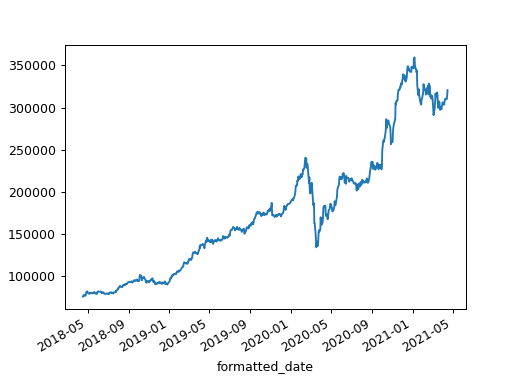

<AxesSubplot:xlabel='formatted_date'>

In [14]:
fig, ax = plt.subplots()
np.sum(data*portfolio*100000, axis=1).plot(ax=ax)

<IPython.core.display.Javascript object>


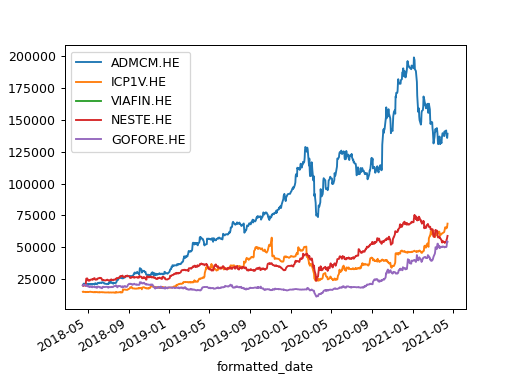

<AxesSubplot:xlabel='formatted_date'>

In [15]:
fig, ax = plt.subplots()
(data*portfolio*100000).plot(ax=ax)

# Sharpe ratio
- Represents both the risk, and return 
- https://www.investopedia.com/terms/s/sharperatio.asp
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.

Formula

$SR = \frac{R_p - R_f}{\sigma_p}$
- $SR$: Sharpe ratio
- $R_p$: return of portfolio
- $R_f$: risk free return
- $\sigma_p$: standard deviation of portfolio

Goal is to get high $SR$. 

In [16]:
portfolio = np.array([.2, .15, .30, .1, .25])

In [17]:
data = df/df.iloc[0]
data

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2018-04-17,1.000000,1.000000,NaN,1.000000,1.000000
2018-04-18,1.004710,1.010000,NaN,0.984677,1.021739
2018-04-19,1.066790,0.996667,NaN,1.010215,1.020652
2018-04-20,1.064650,0.993333,NaN,0.997811,1.008696
2018-04-23,1.063080,0.986667,NaN,1.003283,1.020652
...,...,...,...,...,...
2021-04-12,7.085243,4.316667,NaN,2.701929,2.504241
2021-04-13,6.898222,4.383333,NaN,2.789031,2.515835
2021-04-14,6.833483,4.350000,NaN,2.817472,2.620178


In [18]:
data['Log return'] = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [19]:
data.head()

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE,Log return
formatted_date,,,,,,
2018-04-17,1.00000,1.000000,NaN,1.000000,1.000000,0.000000
2018-04-18,1.00471,1.010000,NaN,0.984677,1.021739,0.006265
2018-04-19,1.06679,0.996667,NaN,1.010215,1.020652,0.012292
2018-04-20,1.06465,0.993333,NaN,0.997811,1.008696,-0.005086
2018-04-23,1.06308,0.986667,NaN,1.003283,1.020652,0.002188


<IPython.core.display.Javascript object>


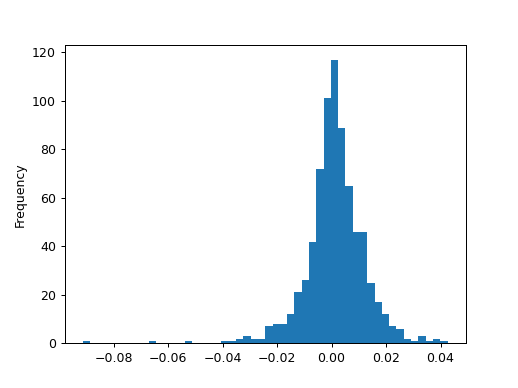

<AxesSubplot:ylabel='Frequency'>

In [20]:
fig, ax = plt.subplots()
data['Log return'].plot(kind='hist', bins=50, ax=ax)

In [21]:
sharpe_ratio = data['Log return'].mean()/data['Log return'].std()
sharpe_ratio

0.11527421521598766

In [22]:
annual_sharpe_ratio = sharpe_ratio * 252 ** 0.5
annual_sharpe_ratio

1.8299214362378469

## Monte Carlo Simulation
- https://en.wikipedia.org/wiki/Monte_Carlo_method

In [23]:
df_carlo = df[df.columns[0:4]]
df_carlo

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE
formatted_date,,,,
2018-04-17,13.902134,6.000000,NaN,16.876831
2018-04-18,13.967607,6.060000,NaN,16.618223
2018-04-19,14.830663,5.980000,NaN,17.049231
2018-04-20,14.800902,5.960000,NaN,16.839886
2018-04-23,14.779078,5.920000,NaN,16.932240
...,...,...,...,...
2021-04-12,98.500000,25.900000,17.200001,45.599998
2021-04-13,95.900002,26.299999,17.400000,47.070000
2021-04-14,95.000000,26.100000,17.150000,47.549999


In [24]:
log_returns = np.log(df_carlo/df_carlo.shift())

In [25]:
weight = np.random.random(4)
weight /= np.sum(weight)

In [26]:
exp_return = np.sum(log_returns.mean()*weight)*252

In [27]:
exp_volatility = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [28]:
sharpe_ratio = exp_return / exp_volatility
sharpe_ratio

1.8410765367881101

In [29]:
# Monte Carlo Simulation
n = 5000

weights = np.zeros((n, 4))
exp_returns = np.zeros(n)
exp_volatilities = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= np.sum(weight)
    weights[i] = weight
    
    exp_returns[i] = np.sum(log_returns.mean()*weight)*252
    exp_volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_returns[i] / exp_volatilities[i]

In [30]:
sharpe_ratios.max()

1.9202377339246377

In [31]:
maxi = sharpe_ratios.argmax()
maxi

1858

In [32]:
weights[maxi]

array([0.46634484, 0.2386564 , 0.15494286, 0.14005591])

<IPython.core.display.Javascript object>


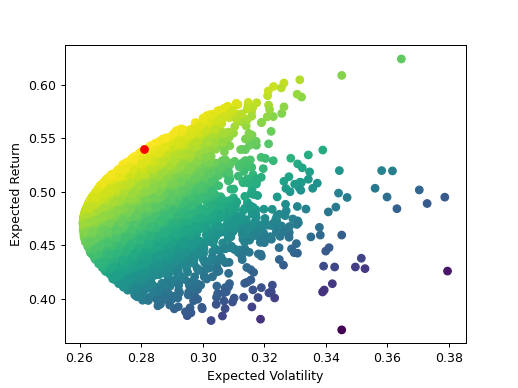

Text(0, 0.5, 'Expected Return')

In [33]:
fig, ax = plt.subplots()
ax.scatter(exp_volatilities, exp_returns, c=sharpe_ratios)
ax.scatter(exp_volatilities[sharpe_ratios.argmax()], exp_returns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel("Expected Volatility")
ax.set_ylabel("Expected Return")

### Efficien Frontier

In [34]:
df_frontier = df[df.columns[0:2]]
df_frontier

,ADMCM.HE,ICP1V.HE
formatted_date,,
2018-04-17,13.902134,6.000000
2018-04-18,13.967607,6.060000
2018-04-19,14.830663,5.980000
2018-04-20,14.800902,5.960000
2018-04-23,14.779078,5.920000
...,...,...
2021-04-12,98.500000,25.900000
2021-04-13,95.900002,26.299999
2021-04-14,95.000000,26.100000


In [35]:
log_return = np.log(df_frontier/df_frontier.shift())

In [36]:
n = 1000

weights = np.zeros((n, 2))
returns = np.zeros(n)
volatilities = np.zeros(n)

for i in range(n):
    weight = np.random.random(2)
    weight /= weight.sum()
    
    weights[i] = weight
    returns[i] = np.sum(weight * log_return.mean() * 252)
    volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_return.cov() * 252, weight)))

<IPython.core.display.Javascript object>


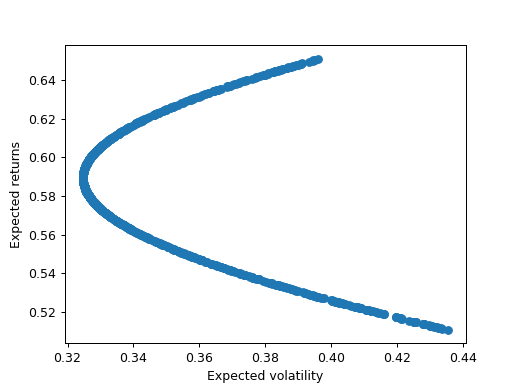

Text(0, 0.5, 'Expected returns')

In [37]:
fig, ax = plt.subplots()
ax.scatter(volatilities, returns)
ax.set_xlabel('Expected volatility')
ax.set_ylabel('Expected returns')

In [38]:
volatilities.argmin()

218

In [39]:
weights[volatilities.argmin()]

array([0.56027656, 0.43972344])

In [40]:
weights[returns.argmin()]

array([0.00155568, 0.99844432])

In [41]:
weights[returns.argmax()]

array([0.99528243, 0.00471757])